<a href="https://colab.research.google.com/github/Aditi16-ctrl/Women-In-Tech/blob/main/women_in_tech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import files

In [ ]:
uploaded = files.upload()


Saving women_in_software_engineering_stats.csv to women_in_software_engineering_stats.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['women_in_software_engineering_stats.csv']))  # Replace 'your_file.csv' with the actual file name
df.head()

,key,company,team,num_female_eng,num_eng,percent_female_eng,last_updated,Submit more data!,https://github.com/triketora/women-in-software-eng
0,all,ALL,NaN,2979,15967,18.66,3/15/2016,NaN,NaN
1,wellsfargo,Wells Fargo,NaN,1296,5407,23.97,7/22/2015,NaN,NaN
2,thoughtworks,ThoughtWorks,NaN,337,1425,23.65,5/19/2014,NaN,NaN
3,mozilla,Mozilla,NaN,43,500,8.60,10/23/2013,NaN,NaN
4,athenahealth,athenahealth,NaN,75,473,15.86,2/25/2016,NaN,NaN


In [ ]:
df.count()

,0
key,251
company,251
team,15
num_female_eng,251
num_eng,251
percent_female_eng,251
last_updated,251
Submit more data!,0
https://github.com/triketora/women-in-software-eng,0


In [ ]:
overall_percentage_female = (df['num_female_eng'].sum() / df['num_eng'].sum()) * 100
print(f"Overall Percentage of Female Engineers: {overall_percentage_female:.2f}%")


Overall Percentage of Female Engineers: 18.66%


In [ ]:
company_group = df.groupby('company').agg(
    total_engineers=('num_eng', 'sum'),
    total_female_engineers=('num_female_eng', 'sum')
)

In [ ]:
company_group['percentage_female_eng'] = (company_group['total_female_engineers'] / company_group['total_engineers']) * 100


In [ ]:
print("Top 5 companies with highest percentage of female engineers:")
print(company_group.sort_values('percentage_female_eng', ascending=False).head(5))

print("Top 5 companies with lowest percentage of female engineers:")
print(company_group.sort_values('percentage_female_eng', ascending=True).head(5))

Top 5 companies with highest percentage of female engineers:
                                        total_engineers  \
company                                                   
Spitfire Athlete                                      2   
HIPAA Risk Management                                 2   
Tog+Porter                                            1   
Kabinet                                               2   
Northwest Independent Ruby Development                8   

                                        total_female_engineers  \
company                                                          
Spitfire Athlete                                             2   
HIPAA Risk Management                                        2   
Tog+Porter                                                   1   
Kabinet                                                      2   
Northwest Independent Ruby Development                       7   

                                        percentage_female_eng 

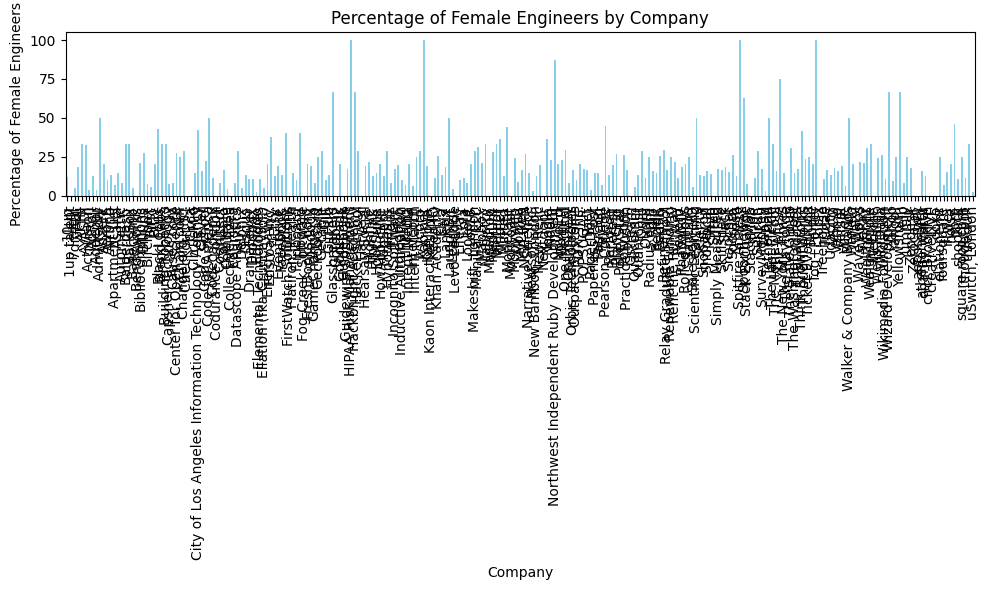

In [ ]:
import matplotlib.pyplot as plt

# Visualize the percentage of female engineers by company
plt.figure(figsize=(10, 6))
company_group['percentage_female_eng'].plot(kind='bar', color='skyblue')
plt.title('Percentage of Female Engineers by Company')
plt.xlabel('Company')
plt.ylabel('Percentage of Female Engineers')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


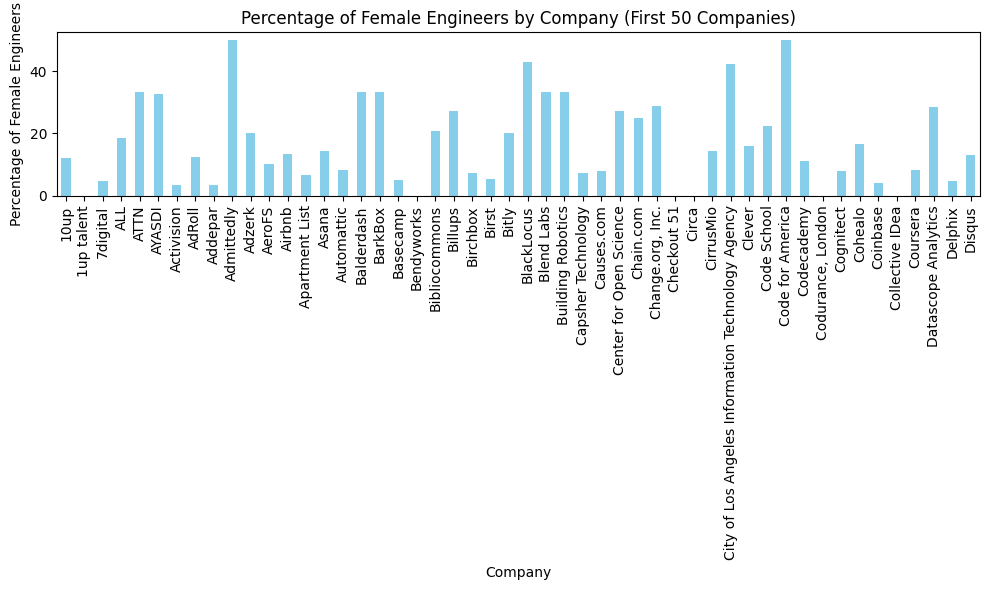

In [ ]:
import matplotlib.pyplot as plt

# Select the first 20 companies
top_50_companies = company_group.head(50)

# Visualize the percentage of female engineers in the first 20 companies
plt.figure(figsize=(10, 6))
top_50_companies['percentage_female_eng'].plot(kind='bar', color='skyblue')
plt.title('Percentage of Female Engineers by Company (First 50 Companies)')
plt.xlabel('Company')
plt.ylabel('Percentage of Female Engineers')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [ ]:
# Group by company and team to analyze trends
team_group = df.groupby(['company', 'team']).agg(
    total_engineers=('num_eng', 'sum'),
    total_female_engineers=('num_female_eng', 'sum')
)

# Calculate percentage of female engineers per team within each company
team_group['percentage_female_eng'] = (team_group['total_female_engineers'] / team_group['total_engineers']) * 100
print(team_group.head())


                                         total_engineers  \
company            team                                    
Balderdash         Sails.js                            6   
Facebook           Parse                              15   
Guidewire Software Foster City office                122   
Liferay            Global Services                    20   
Monetate           Delivery Engineering               25   

                                         total_female_engineers  \
company            team                                           
Balderdash         Sails.js                                   2   
Facebook           Parse                                      2   
Guidewire Software Foster City office                        21   
Liferay            Global Services                            2   
Monetate           Delivery Engineering                      11   

                                         percentage_female_eng  
company            team                     

In [ ]:
# Identify companies with less than 5% female engineers
low_representation_companies = company_group[company_group['percentage_female_eng'] < 5]
print("Companies with less than 5% female engineers:")
print(low_representation_companies)


Companies with less than 5% female engineers:
                        total_engineers  total_female_engineers  \
company                                                           
1up talent                            2                       0   
7digital                             21                       1   
Activision                           30                       1   
Addepar                              29                       1   
Bendyworks                            6                       0   
Checkout 51                           6                       0   
Circa                                 5                       0   
Codurance, London                     3                       0   
Coinbase                             24                       1   
Collective IDea                      14                       0   
Delphix                              64                       3   
Edmodo                               45                       1   
FirstWatch Solut

In [ ]:
# Correlation between team size and percentage of female engineers
correlation = df[['num_eng', 'percent_female_eng']].corr()
print(f"Correlation between team size and female representation: {correlation}")


Correlation between team size and female representation:                      num_eng  percent_female_eng
num_eng             1.000000           -0.007974
percent_female_eng -0.007974            1.000000


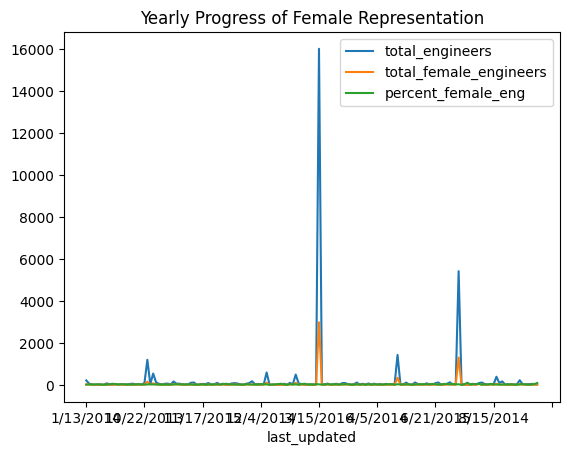

In [ ]:
# Group by year to analyze yearly progress
yearly_trend = df.groupby('last_updated').agg(
    total_engineers=('num_eng', 'sum'),
    total_female_engineers=('num_female_eng', 'sum')
)
yearly_trend['percent_female_eng'] = (yearly_trend['total_female_engineers'] / yearly_trend['total_engineers']) * 100
yearly_trend.plot(kind='line', title='Yearly Progress of Female Representation')
plt.show()


In [ ]:
company_group['disparity'] = company_group['total_engineers'] - company_group['total_female_engineers']
print("Companies with the largest gender disparity in engineering roles:")
print(company_group.sort_values('disparity', ascending=False).head(10))


Companies with the largest gender disparity in engineering roles:
              total_engineers  total_female_engineers  percentage_female_eng  \
company                                                                        
ALL                     15967                    2979              18.657231   
Wells Fargo              5407                    1296              23.968929   
ThoughtWorks             1425                     337              23.649123   
Mozilla                   500                      43               8.600000   
athenahealth              473                      75              15.856237   
Dropbox                   384                      42              10.937500   
Qualcomm                  271                      15               5.535055   
Pinterest                 307                      60              19.543974   
Airbnb                    281                      38              13.523132   
Yelp                      206                      17 

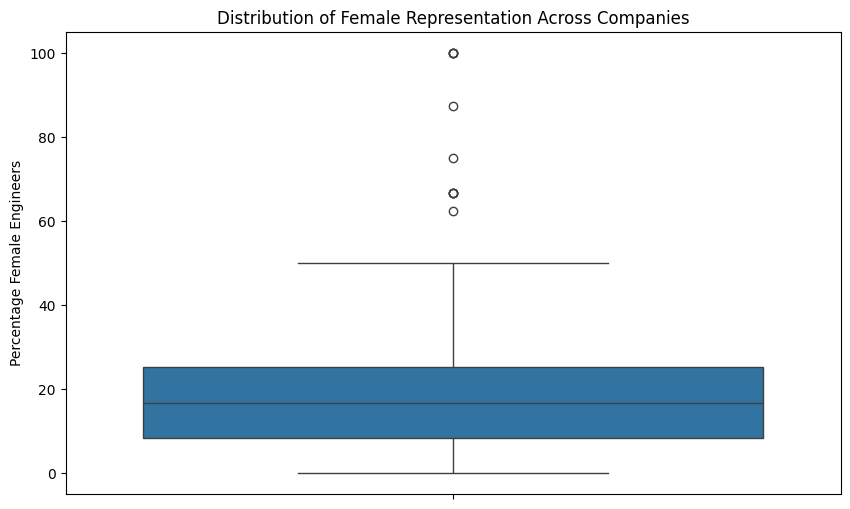

In [ ]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.boxplot(data=company_group, y='percentage_female_eng')
plt.title('Distribution of Female Representation Across Companies')
plt.ylabel('Percentage Female Engineers')
plt.show()


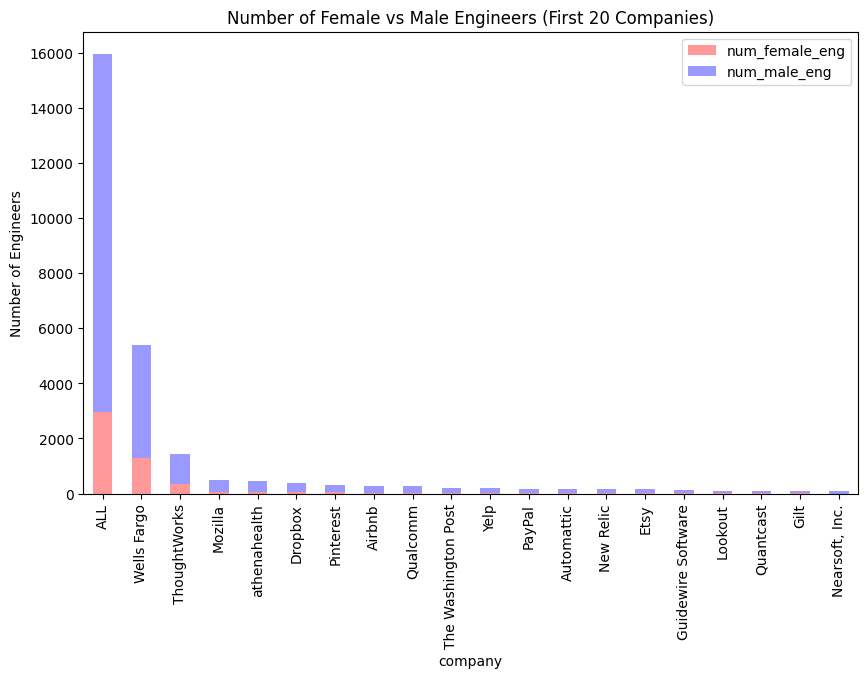

In [ ]:
# Add column for number of male engineers
df['num_male_eng'] = df['num_eng'] - df['num_female_eng']

# Visualize the male vs female engineers in a stacked bar chart
df_top20 = df.head(20)  # First 20 companies
df_top20[['company', 'num_female_eng', 'num_male_eng']].set_index('company').plot(kind='bar', stacked=True, figsize=(10, 6), color=['#FF9999', '#9999FF'])
plt.title('Number of Female vs Male Engineers (First 20 Companies)')
plt.ylabel('Number of Engineers')
plt.xticks(rotation=90)
plt.show()


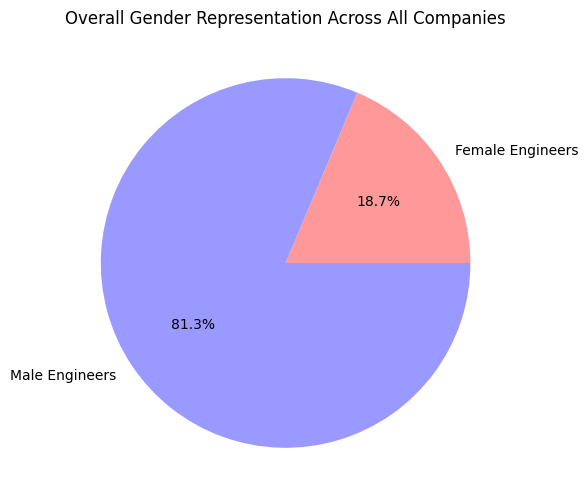

In [ ]:
# Overall proportion of female and male engineers
total_female = df['num_female_eng'].sum()
total_male = df['num_eng'].sum() - total_female

# Pie chart
plt.figure(figsize=(6, 6))
plt.pie([total_female, total_male], labels=['Female Engineers', 'Male Engineers'], autopct='%1.1f%%', colors=['#FF9999', '#9999FF'])
plt.title('Overall Gender Representation Across All Companies')
plt.show()


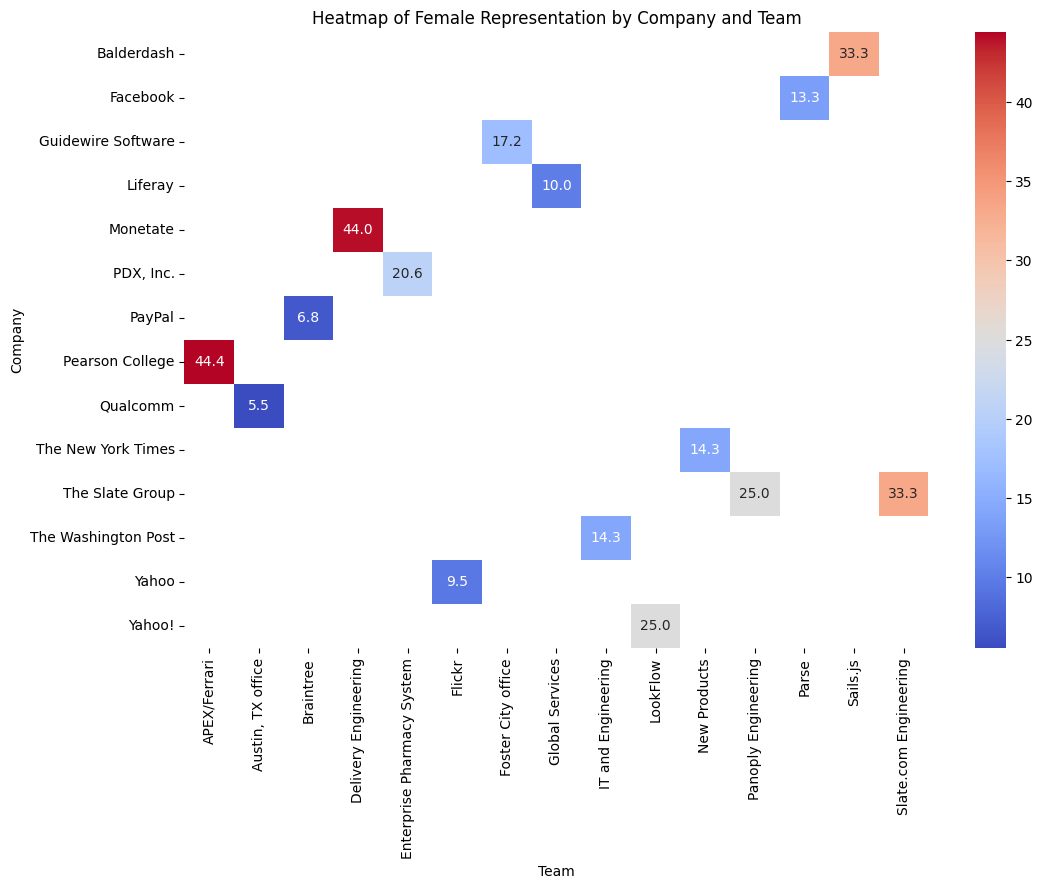

In [ ]:
import seaborn as sns

# Pivot table to create a matrix of companies (rows) and teams (columns) with percentage of female engineers
heatmap_data = df.pivot_table(index='company', columns='team', values='percent_female_eng')

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt='.1f')
plt.title('Heatmap of Female Representation by Company and Team')
plt.ylabel('Company')
plt.xlabel('Team')
plt.show()


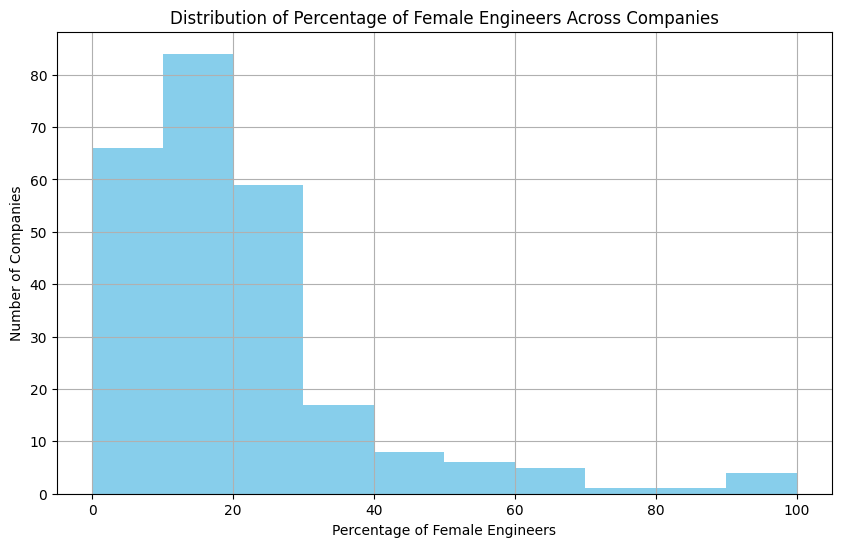

In [ ]:
plt.figure(figsize=(10, 6))
df['percent_female_eng'].hist(bins=10, color='skyblue')
plt.title('Distribution of Percentage of Female Engineers Across Companies')
plt.xlabel('Percentage of Female Engineers')
plt.ylabel('Number of Companies')
plt.show()


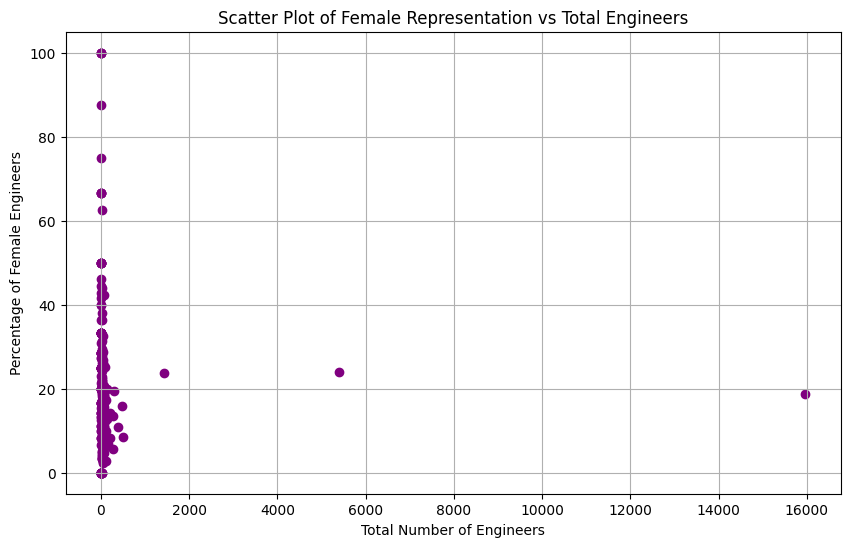

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['num_eng'], df['percent_female_eng'], color='purple')
plt.title('Scatter Plot of Female Representation vs Total Engineers')
plt.xlabel('Total Number of Engineers')
plt.ylabel('Percentage of Female Engineers')
plt.grid(True)
plt.show()
